In [ ]:
# Build a model to predict the severity of an accident


In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('Data-Collisions.csv')

In [ ]:
df.columns

In [ ]:
df['ROADCOND'].value_counts(dropna=False)

In [ ]:
df.head()

So this data is interesting and all but.. I'm from Texas.

I want to look at Texas data.

While researching this, I found that these records do indeed exist.

https://data.world/spatialaustin/texas-crash-records-information-system-cris-extract

I downloaded the 'field lookup' file to see if "crash severity" was a field I could target.


In [ ]:
df = pd.read_csv('lookup_2010_2016.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

In [ ]:
columns = df['ColumnName'].value_counts().to_frame()
columns = columns.index.values.tolist()
columns

haha! CRASH_SEV_ID is indeed listed.

In [ ]:
df.loc[df['ColumnName'] == 'CRASH_SEV_ID']

Accessing this data requires signing up for the CRIS database.

https://www.txdot.gov/government/enforcement/data-access.html

http://ftp.dot.state.tx.us/pub/txdot-info/trf/crash_statistics/automated/cris-guide.pdf

https://cris.dot.state.tx.us/secure/Share/app/home/welcome

You can only request one year of data at a time. I will be using data from the year 2019 (1/1-12/31) to build my model.


It took about a day to get the data from the CRIS team, but once I did, it came in an encrypted zip file. Inside of that were several more zip files, and judging by the filenames, it's the data broken up into smaller date ranges.

![title](img/1.png)

I unzipped the first archive, and poked around the data. The file 'extract_public_2018_20200825003448_crash_20190101-20190301Texas.csv' had the target data, CRASH_SEV_ID. 

My first task is going to be extracting all of the data and pulling it into a pandas dataframe.


In [1]:
import pandas as pd 
from glob import glob
root = "extract_public_2018_20200825003448226_69851_20190101-20191231Texas/"
files = glob(root + '*/*_crash_*.csv')

In [2]:
get_df = lambda f: pd.read_csv(f)
dfdict = {f: pd.read_csv(f) for f in files}

In [3]:
df = pd.concat(dfdict)

In [4]:
df.reset_index()

,level_0,level_1,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
0,extract_public_2018_20200825003448226_69851_20...,0,15657177,N,N,N,N,N,Y,N,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN
1,extract_public_2018_20200825003448226_69851_20...,1,16406486,N,N,N,N,N,Y,N,...,0,0,1,1,0,0,NaN,23.0,NaN,NaN
2,extract_public_2018_20200825003448226_69851_20...,2,16473665,N,N,N,N,N,Y,N,...,1,0,1,0,1,0,NaN,35.0,NaN,NaN
3,extract_public_2018_20200825003448226_69851_20...,3,16871051,N,Y,N,N,N,Y,N,...,0,0,2,0,0,0,282.0,NaN,NaN,NaN
4,extract_public_2018_20200825003448226_69851_20...,4,16995273,N,N,N,N,N,Y,N,...,0,1,6,0,1,0,15.0,53.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,extract_public_2018_20200825003448226_69851_20...,54572,17777131,N,N,N,N,N,N,N,...,0,0,0,2,0,0,NaN,29.0,14.0,NaN
648333,extract_public_2018_20200825003448226_69851_20...,54573,17779640,N,N,N,N,N,N,N,...,0,0,2,0,0,0,15.0,NaN,NaN,NaN
648334,extract_public_2018_20200825003448226_69851_20...,54574,17783015,N,N,N,N,N,N,N,...,0,0,0,1,0,0,NaN,411.0,NaN,NaN
648335,extract_public_2018_20200825003448226_69851_20...,54575,17801355,N,N,N,N,N,N,N,...,0,0,1,0,0,0,15.0,NaN,NaN,NaN


In [5]:
df.shape

(648337, 171)

In [6]:
df['Crash_Sev_ID'].head()

extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20190425-20190618Texas/extract_public_2018_20200825003448_crash_20190425-20190618Texas.csv  0    0
                                                                                                                                                                                                           1    5
                                                                                                                                                                                                           2    2
                                                                                                                                                                                                           3    5
                                                                                                                                                                

In [7]:
columns = df['Crash_Sev_ID'].value_counts().to_frame()
columns = columns.index.values.tolist()
columns

[5, 3, 2, 0, 1, 4]

In [8]:
df.loc[df['Crash_ID'] == 15657177]

,,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,Crash_Date,Crash_Time,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
extract_public_2018_20200825003448226_69851_20190101-20191231Texas/extract_public_2018_20200825003448226_69851_20190425-20190618Texas/extract_public_2018_20200825003448_crash_20190425-20190618Texas.csv,0,15657177,N,N,N,N,N,Y,N,06/02/2019,12:58 PM,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN


This took me a while to figure out! But I now have a dataframe with 648337 and 171 columns.

My next task is to clean the data, dropping any columns that aren't relevant, and working to figure out what data is best for the model.

In [9]:
df.corr()

,Crash_ID,Rpt_CRIS_Cnty_ID,Rpt_City_ID,Rpt_Latitude,Rpt_Longitude,Rpt_Rdwy_Sys_ID,Rpt_Road_Part_ID,Crash_Speed_Limit,Rpt_Sec_Rdwy_Sys_ID,Rpt_Sec_Road_Part_ID,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
Crash_ID,1.000000,0.003499,0.022128,-0.013362,0.019957,0.002953,-0.003374,-0.002920,-0.000822,0.004468,...,-0.001962,-0.003887,0.003074,0.003581,-0.003663,0.004286,-0.007361,-0.006772,-0.003327,NaN
Rpt_CRIS_Cnty_ID,0.003499,1.000000,0.046422,0.135633,-0.057975,-0.023315,-0.030614,-0.017110,-0.015094,-0.012749,...,0.028686,-0.006403,0.013185,-0.066462,0.012946,0.009155,0.142652,-0.053516,0.237994,NaN
Rpt_City_ID,0.022128,0.046422,1.000000,-0.166417,-0.030359,-0.183534,-0.068803,0.240861,-0.178008,-0.020954,...,0.022443,-0.048860,-0.026061,-0.085965,-0.016626,0.046674,-0.210713,-0.147058,-0.159312,NaN
Rpt_Latitude,-0.013362,0.135633,-0.166417,1.000000,-0.086796,-0.082124,0.008225,0.084667,-0.031110,0.018393,...,-0.000692,0.018283,-0.043504,0.008385,0.018697,0.017272,0.551528,-0.040254,-0.089324,NaN
Rpt_Longitude,0.019957,-0.057975,-0.030359,-0.086796,1.000000,0.039125,-0.001477,-0.094534,-0.006592,-0.008423,...,-0.018111,0.025550,0.025239,-0.002705,0.000524,-0.020854,-0.237458,-0.091593,-0.025486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Death_Cnt,0.004286,0.009155,0.046674,0.017272,-0.020854,-0.035346,-0.011626,0.048904,-0.009338,-0.006808,...,0.026749,-0.005944,-0.044865,-0.020432,0.032546,1.000000,0.007780,-0.004863,-0.017671,NaN
MPO_ID,-0.007361,0.142652,-0.210713,0.551528,-0.237458,-0.068448,-0.005132,0.039814,-0.023096,-0.009413,...,0.036434,0.031722,-0.019313,-0.015119,0.049318,0.007780,1.000000,-0.014134,-0.003345,NaN
Investigat_Service_ID,-0.006772,-0.053516,-0.147058,-0.040254,-0.091593,0.117724,0.025627,-0.075761,0.067399,0.014499,...,0.002127,-0.002293,-0.000797,0.026686,-0.004805,-0.004863,-0.014134,1.000000,0.061212,NaN
Investigat_DA_ID,-0.003327,0.237994,-0.159312,-0.089324,-0.025486,0.056870,0.069512,-0.152361,0.013722,0.024298,...,0.024170,-0.001531,0.035228,-0.050865,0.008042,-0.017671,-0.003345,0.061212,1.000000,NaN


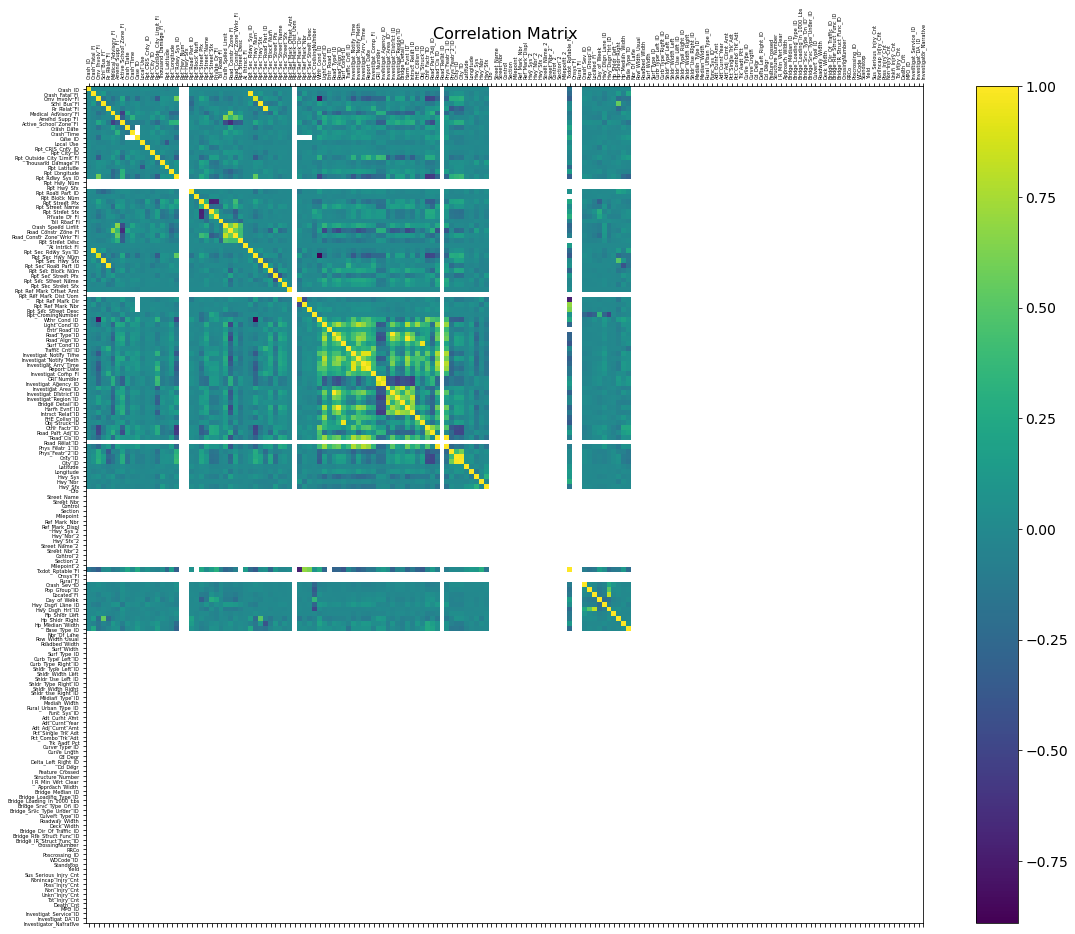

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=5, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [12]:
columns_list = df.columns.to_list()

In [13]:
columns_list

['Crash_ID',
 'Crash_Fatal_Fl',
 'Cmv_Involv_Fl',
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Medical_Advisory_Fl',
 'Amend_Supp_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Case_ID',
 'Local_Use',
 'Rpt_CRIS_Cnty_ID',
 'Rpt_City_ID',
 'Rpt_Outside_City_Limit_Fl',
 'Thousand_Damage_Fl',
 'Rpt_Latitude',
 'Rpt_Longitude',
 'Rpt_Rdwy_Sys_ID',
 'Rpt_Hwy_Num',
 'Rpt_Hwy_Sfx',
 'Rpt_Road_Part_ID',
 'Rpt_Block_Num',
 'Rpt_Street_Pfx',
 'Rpt_Street_Name',
 'Rpt_Street_Sfx',
 'Private_Dr_Fl',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'Rpt_Street_Desc',
 'At_Intrsct_Fl',
 'Rpt_Sec_Rdwy_Sys_ID',
 'Rpt_Sec_Hwy_Num',
 'Rpt_Sec_Hwy_Sfx',
 'Rpt_Sec_Road_Part_ID',
 'Rpt_Sec_Block_Num',
 'Rpt_Sec_Street_Pfx',
 'Rpt_Sec_Street_Name',
 'Rpt_Sec_Street_Sfx',
 'Rpt_Ref_Mark_Offset_Amt',
 'Rpt_Ref_Mark_Dist_Uom',
 'Rpt_Ref_Mark_Dir',
 'Rpt_Ref_Mark_Nbr',
 'Rpt_Sec_Street_Desc',
 'Rpt_CrossingNumber',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Entr_Road_I

This is a list of all of the columns. Most of them are not relevant. We need to dig through the list and make sure we understand each column. I suspect that what we need to do is break this list into two columns - items that were conditions leading up to the crash, and items that are effects of the crash. For example, road conditions are likely contributors to the crash, while the damage to the vehicle is a result of the crash. Let's call these 'contributors' and 'results'. There are also going to be completely irrelevant factors, like the investigating service, that we can remove entirely.

After a lot of digging, I found the file File_Descriptions that I needed to help discern what field meant what. I plan to use this to inform my decisions going forward.